# Optimization Algorithms in Machine Learning

**Aim**: We give an overview of optimization methods from a Machine Learning perspective. We concentrate on Gradient Descent optimization and also give some outlook on (higher-order) methods like Conjugate Gradient and BFGS. Other searching techniques such as genetic algorithms or Monte Carlo techniques are not discussed here.

# Preamble

In [2]:
# Common imports
import numpy as np # numpy is THE toolbox for scientific computing with python
import pandas as pd # pandas provides THE data structure and data analysis tools for data scientists 
import pickle # we have to import a pickle file
import os 
# from datetime import timedelta, datetime

# maximum number of columns
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Introduction

Optimization is one of the core components of a machine learning algorithm. Most machine learning problems can be solved as optimization problems: The aim is to find the extremum of an objective function. This means, to build an optimization function and learn the parameters in the objective function from the given data. 

We can generally divide optimization methods into three categories:

*    first-order optimization methods, such as Gradient Descent
*    high-order optimization methods, such as Newton's method
*    heuristic derivative-free optimization methods, such as genetic algorithms.

What is the difference between first-order and high-order optimization? Compared with first-order optimization methods, high-order methods converge at a faster speed in which the curvature information (higher order derivative) makes the search direction more effective. The difficulty in the high-order methods lies in the storage of the inverse matrix or the Hessian matrix.

Derivate-free optimization methods are mainly used in the case that the derivative of the objective function may not exist or be difficult to calculate. As we learn in unit 6 of the course book, genetic algorithms are an example of a derivative-free optimization method..

## Supervised Learning

For supervised learning the goal is to find an optimal mapping function $f(x)$ to minimize the loss function $L$ of the training samples:

\begin{equation}
\text{min}_{\theta} \frac{1}{m} \left[ \sum_{i=1}^{m}L\left(y_i, f(x_i, \theta)\right) \right] 
\end{equation}

where the loss function can be the square of the Euclidean distance, cross-entropy, hine loss, information gain and so on. Adding a regularization term to the loss yields:

\begin{equation}
\text{min}_{\theta}  \frac{1}{m} \left[ \sum_{i=1}^{m}L\left(y_i, f(x_i, \theta)\right) \right] + \lambda \| \theta \|_2^2
\end{equation}

## Unsupervised Learning

K-Means Clustering:

Estimating a probability density:

# First-Order Method: Gradient Descent

Let us start with the loss/cost/objective for linear regression, which is minimizing the sum of squares (MSE = mean squared error)

\begin{equation} 
\text{MSE} = \text{min} \frac{1}{m} \left[ \sum_{i = 1}^{m} \left( \theta^T x^{(i)} -y^{(i)} \right)^2 \right]
\end{equation}

As you might probably know for linear regression the minimum can be expressed in closed form, the so-called *Normal Equation*:

\begin{equation}
\hat{\theta} = \left( X^{T} X \right)^{-1} \, X^T y \; . 
\end{equation}

However, inverting the design matrix $X$ can be computationally very expensive when the number of features is large. This is why the Normal Equation is not used in any practical use case.

## Batch Gradient Descent

Gradient Descent is a first-order numerical optimization algorithm. It is an iterative approach. We start with filling $\mathbb{\theta}$ with random values and then try to go down the slope: 

![](gradient_descent.png)

To implement Gradient Descent the gradient of the cost function needs to be calculated with reard to each model parameter $\theta_j$ ($j$ features and $i$ samples):

\begin{equation}
\frac{\partial}{\partial \theta_j} L = \frac{\partial}{\partial \theta_j} \text{MSE} = \frac{2}{m} \sum_{i=1}^N \left( \theta^T x^{(i)} -y^{(i)} \right) x^{(i)}_j
\end{equation}

The gradient vector $\nabla$ is a vector of all the partial derivatives of $\mathbb{\theta}$. Here the learning rate $\eta$ comes into play. This is the step size we go down the slope:
\begin{equation}
\theta^{\text{next step}} = \theta - \eta \nabla_{\theta} \text{MSE}\left(\theta \right) \; . 
\end{equation}

This formula involves calculations over the full training set $X$ at each Gradient Descent step. This is why the algorithm is called *Batch Gradient Descent*. 

If $\eta$ is hugh, we will jump out of the minimum region and if it is too slow, the algorithm will take very long to converge. Let us look at different learning rates.

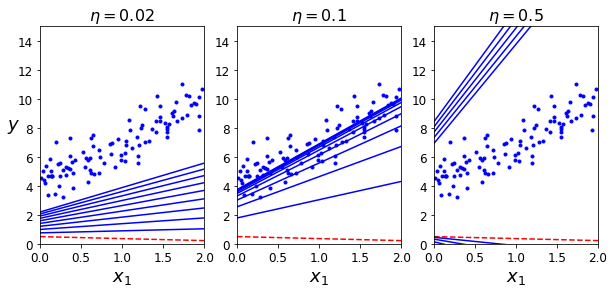

In [5]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

## Stochastic Gradient Descent

Batch Gradient Descent uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. *Stochastic Gradient Descent* picks a random instance in the training set at every step and computes the **gradients based only on that single instance**. 

Due to its stochastic nature, the algorithm is much less regular than Batch Gradient Descent. When the cost function is very irregular, this stochastic nature can help the algorithm jump out of the local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does. 

Important for Stochastic Gradient Descent is the concept of *simulated annealing*: in order to settle at the minimum the step size gets smaller and smaller.

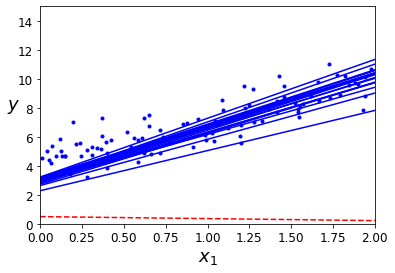

In [9]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

# Here the number of training rounds is called epoch.
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

We iterate by rounds of $m$ iterations. Each round is called an $epoch$. While the Batch Gradient Descent code iterated 1000 times through the whole training set, this code goes through the training set only 50 times and reaches a pretty good solution.

In [10]:
print(theta)

# Linear Regression with Stochastic Gradient Descent with Scikit-Learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[[4.24042206]
 [2.81339809]]
[4.25667443] [2.86495033]


## Mini-batch Gradient Descent

*Mini-batch Gradient Descent* computes the gradients on small random sets of instances called *mini-batches*. The algorithm's progress in parameter space is less erratic than with Stochastic Gradient Descent, especially with fairly large mini-batches. Moreover, when using GPUs Mini-batch Gradient Descent can be really fast due to the parallelization of matrix operations. 

In [11]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

[[4.23219116]
 [2.82565088]]


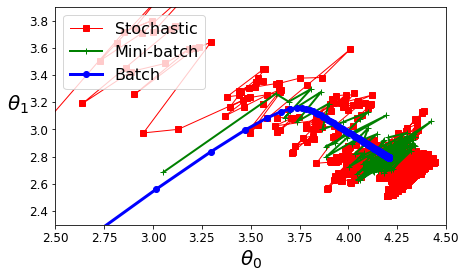

In [12]:
print(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

The gradient descent method is simple to implement. The solution is global optimal when the objective function is
convex.

# High-Order Methods

Gradient descent can easily diverge, if the step size $\eta$ is not chosen appropriately. Here **Newton's method** is helpful, which avoids choosig the step $\eta$ and uses the second order derivative:

\begin{equation}
\theta^{\text{next step}} = \theta - \frac{\partial f}{\partial^2 f} \; . 
\end{equation}
 
The second-order methods can be used for addressing the problem where an objective function is highly non-linear and ill-conditioned. They work effectively by introducing curvature information (ie. higher order derivatives).

Here the so-called **Hessian Matrix** becomes important, which is basically all the different second-order partial derivatives. 

Although the convergence of the algorithm can be guaranteed, the computational process is costly and thus rarely used for solving large machine learning problems. In recent years, with the continuous improvement of high-order optimization methods, more and more high-order methods have been proposed to handle large scale data by using stochastic techniques.


## Quasi-Newton's Method 

It tries to find a way to approximate the Hessian matrix. An approximation $B$ for the Hessian matrix $H$ is used. 


*    DFP: It gives a quite complicated formula for the update of the matrix $B$.


*    BFGS (Broyden, Fletcher, Goldfarb, Shanno): another formula for the update of $B$. Storing the sequence of matrices is still an issue, especially for high-dimensional problems.


*    L-BFGS (Limited memory BFGS): basically it tries to store just some vectors instead of the full approximation of the Hessian matrix. 

### Stochastic Quasi-Newton Method

In many large-scale machine learning models (in analogy to what we have learned for stochastic gradient descent) it is necessary to use a stochastic approximation algorithm. Online-BFGS and online-LBFGS are two variants of such stochastic higher-order optimizations.

## Hessian-Free Optimization Method

# Derivative-Free Optimization

For some optimization problems in practical applications,
the derivative of the objective function may not exist or is not
easy to calculate. The solution of finding the optimal point,
in this case, is called derivative-free optimization.

There are many types of heuristic optimization
methods, including classical simulated annealing arithmetic,
genetic algorithms, ant colony algorithms, and particle swarm
optimization. These heuristic methods usually
yield approximate global optimal values, and theoretical
support is weak. 